# 4.3    PREDICTIVE ANALYTICS TECHNIQUE

## 4.3.1 PRESENTATION OF DATA
The dataset to be analysed using this technique will be imported, read into our dataframe, and displayed below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Markdown, display

def printTitle(title):
    display(Markdown(("### **"+title+"**").upper()))

In [2]:
title = "TABLE 1 : importing our dataset, reading it into our dataframe, viewing the dataset"
printTitle(title)
data = pd.read_csv('word/insurance.csv')
data

### **TABLE 1 : IMPORTING OUR DATASET, READING IT INTO OUR DATAFRAME, VIEWING THE DATASET**

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 4.3.2 ANALYSIS OF DATA ACCORDING TO RESEARCH QUESTIONS
Using the model for prediction, the steps to follow includes:

    • Data processing
    • Model evaluation
    • Predicting insurance premium charge with our model
    
    
    

## 1. DATA PROCESSING

### a. DATA CLEANING

We need to represent all data numerically. Some of our predictors (sex and smoker) are categorical data and since they have two categories:

- sex - male and female
- smoker - yes and no

we  encode these categories in binary values.

For sex:
- 0 for male
- 1 for female

For smoker:
- 1 for yes 
- 0 for no 

Also 'region' column has 4 categories:

In [3]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

These will be encoded accordingly: 
- southeast : 0 
- northwest : 1
- southwest : 2 
- northeast : 3

In [4]:
data['sex'] = data.sex.map({'male':0,'female':1})
data['smoker'] = data.smoker.map({'yes':1,'no':0})
data['region'] = data.region.map({'southeast' : 0, 'northwest': 1, 'southwest': 2, 'northeast':3})

After converting all categorical data to numerical data we have our dataset:

In [5]:
title =  "table 2 : Our Dataset, After converting all categorical data to numerical data"
printTitle(title)
data

### **TABLE 2 : OUR DATASET, AFTER CONVERTING ALL CATEGORICAL DATA TO NUMERICAL DATA**

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
5,31,1,25.740,0,0,0,3756.62160
6,46,1,33.440,1,0,0,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,1,28923.13692


### b. DATA VISUALIZATION

Here we are going to visualize the relationship between the dependent and the independent variable using scatterplots .

The relationship between charges and each independent variables can be seen below: 

### **GRAPH 1 : RELATIONSHIP BETWEEN CHARGES AND EACH INDEPENDENT VARIABLES**

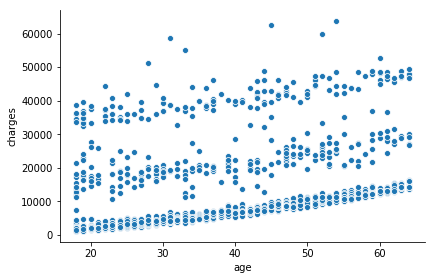

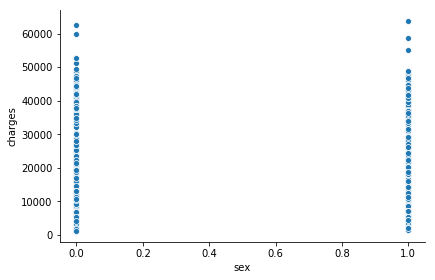

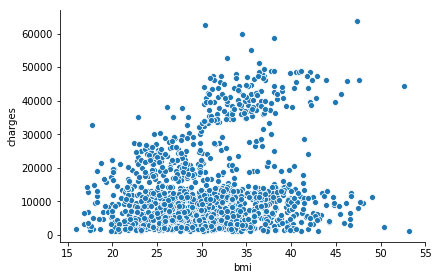

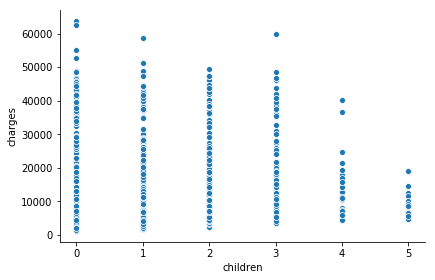

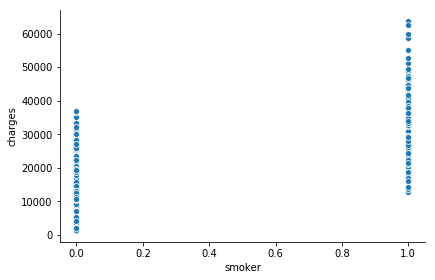

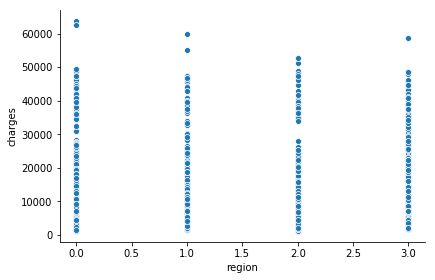

In [6]:
import seaborn as sns

col = list(data)
col.remove('charges')

title =  "Graph 1 : Relationship between charges and each independent variables"
printTitle(title)

for i in col:
    sns.pairplot(data, x_vars=[i], y_vars='charges', height=4, aspect=1.5)

### c. QUESTIONS ABOUT THE INSURANCE DATASET
 1. Is there a relationship between:
     - Sex and charges?
     - Age and charges?
     - Smoker and charges?
     - bmi and charges?
     - Children and charges?
     - regions and charges?
     
     
 2. If there is, how strong is that relationship?
 3. What is the effect of each independent variable on the dependent variable?
 4. With this data set, can premium be estimated for a new life insurance policy holder?
 5. How accurate is the prediction?
 
This questions will be answered in the model evaluation stage     

## 2. MODEL EVALUATION

### a. PREPARING THE DATASET FOR TRAINING THE MODEL
At this stage we select independent variables to used in our model by evaluating their p-values.

We select and use independent variables that have strong relationship with the dependent variable and drop the column or not include in our model the independent variables that have weak or no relationship with the dependent variable. 

In [7]:
import statsmodels.formula.api as smf

mod_coef = smf.ols(formula='charges ~ age + sex + bmi + children + smoker + region', data=data).fit()

###  Hypothesis Testing And P-Values

In [8]:
print "These are our independent variables and their corresponding p-values"
mod_coef.pvalues

These are our independent variables and their corresponding p-values


Intercept    4.068838e-33
age          6.243711e-89
sex          6.952873e-01
bmi          8.292445e-31
children     5.983277e-04
smoker       0.000000e+00
region       1.051604e-01
dtype: float64

From the output above each feature have significant p-values except sex and region. Thus we reject the null hypothesis for age, bmi, children, smoker and fail to reject the null hypothesis for sex and region. 
This is one way to determine which columns are insignificant and should be dropped from a dataset.

'smoker' has the strongest relationship with charges, followed by age, body mass index, children. Sex and region both have very weak relationship with charges therefore will be dropped from our data set and not be used in our model.

Here's a view of our dataset after dropping the sex and region column:

In [9]:
data_ii = data.drop(['sex','region'], axis=1)
title = "table 3 : Dataset after dropping the insignificant independent variables (sex and region column)"
printTitle(title)
data_ii

### **TABLE 3 : DATASET AFTER DROPPING THE INSIGNIFICANT INDEPENDENT VARIABLES (SEX AND REGION COLUMN)**

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
5,31,25.740,0,0,3756.62160
6,46,33.440,1,0,8240.58960
7,37,27.740,3,0,7281.50560
8,37,29.830,2,0,6406.41070
9,60,25.840,0,0,28923.13692


### b. ESTIMATING OR 'LEARINING' THE MODEL COEFFICIENT
We use the Statsmodels Library to estimate our model coefficients.

In [10]:
import statsmodels.formula.api as smf
print "Independent variables and their Coefficient"

mod_coef = smf.ols(formula='charges ~ age + bmi + children + smoker', data=data_ii).fit()
mod_coef.params

Independent variables and their Coefficient


Intercept   -12102.769363
age            257.849507
bmi            321.851402
children       473.502316
smoker       23811.399845
dtype: float64

The coefficient of each independent variable to be used in our model can be seen above


### c. INTERPRETING THE MODEL COEFFICIENT

Generally a unit increase in any of: age, bmi, children, smoker, is associated with a unit increase in premium charges up to the value of the corresponding model coefficient.

More clearly: A Unit increase in body mass index of a policy holder is associated with a 321.851402 unit increase in his/her premium charge. If the model coefficient is negative, then a unit increase will cause a unit decrease in the premium charge.

### d. SPLITTING THE DATASET INTO TRAINING AND TESTING SET
A higher percentage is used for training the model while a smaller portion of the data is used to test the model. This is implemented below:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data_ii[['age','bmi','children','smoker']]
y = data_ii.charges

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### e. TRAINING AND TESTING THE MODEL
The model is trained to predict the known outputs/premium charges using the training dataset and later tested using the test dataset. The test data is used to test the accuracy of the model.

In [12]:
# instantiate the model
model = LinearRegression()

#fit Model
model.fit(X_train, y_train)

# make prediction based on the test data
predictions = model.predict(X_test)

### f. MODEL EVALUATION: PREDICTION ACCURACY OF TEST DATASET AND R-SQUARED

### Prediction Accuracy Of The Test Set

After training the model with our training dataset, we try to predict our already know dependent variable/premium charge in our test dataset then compare this prediction (predicted test charges) against the actual test charges to evaluate the accuracy of the model.

Below is a table showing Actual Test Dataset Premium Charges against their Predicted Test Dataset Premium Charges:

In [13]:
from pandas import Series, DataFrame

data_iii = {'Actual Test Dataset Premium Charges':y_test, 'Predicted Test Dataset Premium Charges':predictions}
frameData_iii = pd.DataFrame(data_iii)
title =  "table 4 : Test Dataset Premium Charges: Actual Charges and their corresponding Predicted Charges"
printTitle(title)
frameData_iii

### **TABLE 4 : TEST DATASET PREMIUM CHARGES: ACTUAL CHARGES AND THEIR CORRESPONDING PREDICTED CHARGES**

,Actual Test Dataset Premium Charges,Predicted Test Dataset Premium Charges
559,1646.42970,3898.198488
1087,11353.22760,12846.443859
1020,8798.59300,12853.105439
460,10381.47870,13679.300235
802,2103.08000,1031.772047
298,38746.35510,31954.393745
481,9304.70190,13448.727314
616,11658.11505,11714.565290
763,3070.80870,3236.855885
750,19539.24300,29736.544591


In [14]:
# accuracy of the prediction
model_accuracy = model.score(X_test, y_test)
model_accuracy

0.7385564961370813

#### The accuracy of the model is : 73.86%

#### Visualizing The Relationship Between The Actual Premium Charges In Test Data Set And Their Corresponding Predicted Value Using Our Model 


### **GRAPH 2 : RELATIONSHIP BETWEEN ACTUAL PREMIUM CHARGES IN TEST DATASET VS THEIR CORRESPONDING PREDICTED VALUE (USING OUR MODEL FOR PREDICTION)**

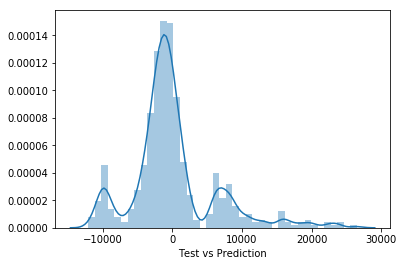

In [15]:
sns.distplot(y_test - predictions, axlabel="Test vs Prediction")

title =  'Graph 2 : Relationship Between Actual Premium Charges In Test Dataset VS Their Corresponding Predicted Value (Using Our Model For Prediction)'
printTitle(title)

### R-squared
To evaluate the overall fit of a linear model, we analyse the R-squared. The proportion of variance in the observed data that is explained by the model is the R-squared. The R-squared is between 0 and 1 and the higher the R-square the better because it means that more variance is explained by the model.


In [16]:
# R-square
model_rsquare = mod_coef.rsquared
model_rsquare

0.74969453034647904


#### The R-squared value for our model is 74.97%

The R-squared is most useful in comparing different models

### g. SUMMARY OF THE FITTED MODEL

In [17]:
title =  "table 5 : SUMMARY OF THE FITTED MODEL"
printTitle(title)
mod_coef.summary()

### **TABLE 5 : SUMMARY OF THE FITTED MODEL**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 17 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:40:43   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
age          257.8495     11.896     21.675      0.000     234.512     281.187
bmi          321.8514     27.378     11.756      0.000     268.143     375.559
children     473.5023    137.792      3.436      0.001     203.190     743.814
smoker      2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. USING OUR MODEL TO PREDICT INSURANCE PREMIUM CHARGE 

#### CASE STUDY:  
A new policy holder insured his life at Leadway Insurance Company. Among other details provided, the following were relevant to this study:
    - Age : 55
    - Sex : male
    - BMI : 47.843
    - Children : 4
    - Smoker : no
    - Region : Southeast
    
Determine/predict the premium that should be charged.

### IMPLEMENTATION

We predict insurance premium charge for a new policy holder following the steps:

  - Import the Multiple Linear Regression Model from the Python’s Scikit-Learn  Library
  - Instantiate or run the model
  - Fit the data into our model
  - Predict for a new policy holder using model coefficient

Recall that region and sex do not have strong relationship with  insurance premium charge. Hence for better prediction, they will be excluded from our model.

In [18]:
#import the linear regression model
from sklearn.linear_model import LinearRegression

# x represent the independent variables while y, the dependent variable
X = data_ii[['age','bmi','children','smoker']]
y = data_ii.charges

#instantiate the model
my_model = LinearRegression()

# fit our dataset into our model
my_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### PREDICT PREMIUM CHARGE FOR A NEW POLICY HOLDER

In [19]:
my_model.predict([[55,47.843,4,0]])

array([ 19371.29944809])

#### Based on this model, the new policy holder should be charged a premium of 19371.29944809